# 🍷 Wine Quality Dataset

#  Description :
Ce jeu de données concerne les variantes rouges du vin portugais "Vinho Verde".  
Il décrit la quantité de différentes substances chimiques présentes dans le vin et leur effet sur sa qualité. 

**La tâche consiste à prédire la qualité du vin à partir des données fournies.**

## Objectif du projet
### Construire un modèle prédicatif pour prédire la qualité du vin.

### Ce DataFrame contient les colonnes suivantes :
Variables d'entrée (issues de tests physico-chimiques) :  
1 - fixed acidity  
2 - volatile acidity  
3 - citric acid  
4 - residual sugar  
5 - chlorides  
6 - free sulfur dioxide  
7 - total sulfur dioxide  
8 - density  
9 - pH  
10 - sulphates  
11 - alcohol  

Variable de sortie (issue de données sensorielles) :    
12 - quality (score between 0 and 10)


Remerciements :
Ce jeu de données est également disponible sur Kaggle et dans le dépôt UCI de machine learning :
https://archive.ics.uci.edu/ml/datasets/wine+quality

Objectif :
- Comprendre le jeu de données et le nettoyer (si nécessaire)
- Construire des modèles de classification pour prédire la qualité du vin
- Ajuster les hyperparamètres et comparer les métriques d’évaluation de différents algorithmes de classification

In [1]:
# Wine Quality 
# Objectif : Prédire la qualité du vin 

# 1. Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
#  Suppression des logs et warnings TensorFlow
import os, logging, warnings

# Ne conserver que les erreurs critiques (FATAL)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  
logging.getLogger('tensorflow').setLevel(logging.ERROR)

# Optionnel : masquer les warnings Python (deprecation, clipping, etc.)
warnings.filterwarnings('ignore')

### Chargement & Nettoyage :  
Dataset propre, contrôle des types et valeurs manquantes effectuées en amont. Suppression des colonnes inutiles et création de la variable bound_SO2 pour enrichir le jeu de données.

In [3]:
# 2. Chargement et aperçu du dataset
df = pd.read_csv("WineQT.csv")

print("Aperçu des données :")
display(df.head())


Aperçu des données :


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
# Exploration rapide du dataset
print("\nInfos :")
print(df.info())

print("\nStatistiques globales :")
display(df.describe().T)

print("\nValeurs evec zeros :")
display(df.isin([0]).sum())

# Affichage des doublons
print("\n Nombre des doublons :")
display(df.duplicated().sum())


Infos :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
None

Statistiques globales :


,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000



Valeurs evec zeros :


fixed acidity            0
volatile acidity         0
citric acid             99
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
Id                       1
dtype: int64


 Nombre des doublons :


np.int64(0)

#### Feature engineering :  
Ajout de bound_SO2, suppression de ‘Id’ et ‘total sulfur dioxide’,  suppression des doublons : étape clée pour obtenir un dataset exploitable et pertinent pour la modélisation.  
Remplacement des valeurs zéros par une valeur très proche du zéro, cela évite les problèmes de division par zéro et d'autres erreurs numériques.

In [5]:
# 1. Feature engineering v1

# Copie de la dataframe
df_v1 = df.copy()

df_v1['bound_SO2'] = df_v1['total sulfur dioxide'] - df_v1['free sulfur dioxide']
drop_cols = []
if 'Id' in df_v1.columns:
    drop_cols.append('Id')
if 'total sulfur dioxide' in df_v1.columns:
    drop_cols.append('total sulfur dioxide')
df_v1 = df_v1.drop(columns=drop_cols)

# Remplacement des zeros par une valeur tres proche du zero
df_v1.replace(to_replace=0, value=1e-12, inplace=True)

# Gestion des doublons
# Garde la première occurrence uniquement
avant = len(df_v1)
df_v1 = df_v1.drop_duplicates(keep='first')
apres = len(df_v1)
print(f"Suppression des doublons : {avant - apres} lignes supprimées ({avant} → {apres})")

print("\nValeurs evec zeros :")
display(df_v1.isin([0]).sum())

Suppression des doublons : 125 lignes supprimées (1143 → 1018)

Valeurs evec zeros :


fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
bound_SO2              0
dtype: int64

#### Pipeline ML (sans regroupement) :  
Séparation train/test, standardisation des variables pour assurer l’équité des contributions.  
Tests de la régression logistique (base linéaire) et de la Random Forest (non-linéaire), avec analyse comparative des résultats sur la qualité exacte.

In [6]:
# Separation des données en features (X) et target (y)
X = df_v1.drop(['quality'], axis=1)
y = df_v1['quality']

In [7]:
# Split des données en train et test avec stratification pour maintenir la répartition des classes

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Régression Logistique (base linéaire) avec multi-classes

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

logreg = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)

print("=== Logistic Regression (multi-classes) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_logreg))
print("Log Loss Logistic Regression :", log_loss(y_test, y_proba_logreg, labels=logreg.classes_))


=== Logistic Regression (multi-classes) ===
Accuracy : 0.3872549019607843
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.08      0.43      0.14         7
           5       0.62      0.47      0.54        87
           6       0.55      0.28      0.37        82
           7       0.36      0.42      0.38        24
           8       0.08      0.67      0.14         3

    accuracy                           0.39       204
   macro avg       0.28      0.38      0.26       204
weighted avg       0.53      0.39      0.43       204

Matrice de confusion :
 [[ 0  0  1  0  0  0]
 [ 0  3  2  1  0  1]
 [ 5 23 41 14  3  1]
 [ 0 11 21 23 14 13]
 [ 0  0  1  4 10  9]
 [ 0  0  0  0  1  2]]
Log Loss Logistic Regression : 1.4015621492374493


In [9]:
# Classificaton avec RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced', n_estimators=200, random_state=42)
rf.fit(X_train_scaled, y_train)

y_pred_rf = rf.predict(X_test_scaled)
y_proba_rf = rf.predict_proba(X_test_scaled)

print("=== Random Forest (multi-classes) ===")
print("Accuracy :", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_rf))
print("Log Loss Random Forest :", log_loss(y_test, y_proba_rf, labels=rf.classes_))


=== Random Forest (multi-classes) ===
Accuracy : 0.5637254901960784
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.64      0.64      0.64        87
           6       0.52      0.61      0.56        82
           7       0.53      0.38      0.44        24
           8       0.00      0.00      0.00         3

    accuracy                           0.56       204
   macro avg       0.28      0.27      0.27       204
weighted avg       0.55      0.56      0.55       204

Matrice de confusion :
 [[ 0  0  1  0  0  0]
 [ 0  0  4  3  0  0]
 [ 0  1 56 29  1  0]
 [ 0  2 25 50  5  0]
 [ 0  0  1 13  9  1]
 [ 0  0  0  1  2  0]]
Log Loss Random Forest : 1.0874808771010964


#### Pipeline ML (regroupement 3 classes) :
Regroupement des scores de qualité en 3 classes métiers (‘faible’, ‘moyen’, ‘élevé’), qui rend la tâche plus réaliste d’un point de vue applicatif.  
Les modèles sont réentraînés et comparés, avec optimisation des hyperparamètres Random Forest pour maximiser l’accuracy et la log-loss

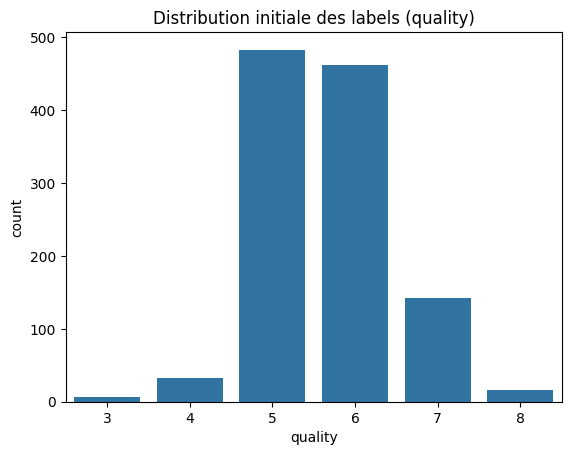

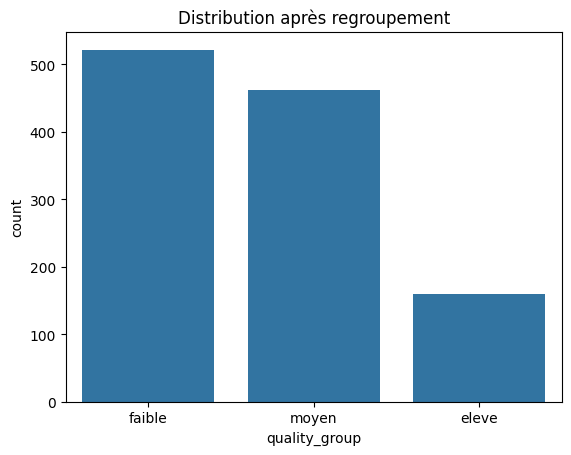

quality_group
faible    522
moyen     462
eleve     159
Name: count, dtype: int64


In [10]:
# 3. Visualisation initiale et regroupement des classes
sns.countplot(x="quality", data=df)
plt.title("Distribution initiale des labels (quality)")
plt.show()

def regroupe_qualite(q):
    if q <= 5:
        return "faible"
    elif q <= 6:
        return "moyen"
    else:
        return "eleve"
df["quality_group"] = df["quality"].apply(regroupe_qualite)

sns.countplot(x="quality_group", data=df)
plt.title("Distribution après regroupement")
plt.show()
print(df["quality_group"].value_counts())


In [11]:
# Feature engineering : création d'une nouvelle variable 'bound_SO2'
# Création de la feature bound_SO2
df['bound_SO2'] = df['total sulfur dioxide'] - df['free sulfur dioxide']

# Suppression des colonnes inutiles ou redondantes
drop_cols = []
if 'Id' in df.columns:
    drop_cols.append('Id')
if 'total sulfur dioxide' in df.columns:
    drop_cols.append('total sulfur dioxide')
df = df.drop(columns=drop_cols)

# Remplacement des zeros par une valeur tres proche du zero
df.replace(to_replace=0, value=1e-12, inplace=True)

# Vérification et suppression des doublons (après regroupement des catégories)
# Garde la première occurrence uniquement
avant = len(df)
df = df.drop_duplicates(keep='first')
apres = len(df)
print(f"Suppression des doublons : {avant - apres} lignes supprimées ({avant} → {apres})")

print("\nValeurs evec zeros :")
display(df.isin([0]).sum())

Suppression des doublons : 125 lignes supprimées (1143 → 1018)

Valeurs evec zeros :


fixed acidity          0
volatile acidity       0
citric acid            0
residual sugar         0
chlorides              0
free sulfur dioxide    0
density                0
pH                     0
sulphates              0
alcohol                0
quality                0
quality_group          0
bound_SO2              0
dtype: int64

In [12]:
# 4. Prétraitement des données
X = df.drop(['quality', 'quality_group'], axis=1)
y = df['quality_group']

# Split train/test (stratifié)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardisation des features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
# Exectution du modèle de régression logistique (multiclass) faible moyen eleve

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, log_loss

# Modèle Logistic Regression (multiclass, balanced pour les classes rares)
logreg = LogisticRegression(multi_class='multinomial', class_weight='balanced', max_iter=1000, random_state=42)
logreg.fit(X_train_scaled, y_train)

y_pred_logreg = logreg.predict(X_test_scaled)
y_proba_logreg = logreg.predict_proba(X_test_scaled)

print("=== Logistic Regression ===")
print("Accuracy :", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred_logreg))

# Log-loss
loss_logreg = log_loss(y_test, y_proba_logreg, labels=logreg.classes_)
print("Log Loss Logistic Regression :", loss_logreg)


=== Logistic Regression ===
Accuracy : 0.6519607843137255
              precision    recall  f1-score   support

       eleve       0.53      0.74      0.62        27
      faible       0.71      0.78      0.74        95
       moyen       0.63      0.48      0.54        82

    accuracy                           0.65       204
   macro avg       0.62      0.67      0.63       204
weighted avg       0.65      0.65      0.65       204

Matrice de confusion :
 [[20  1  6]
 [ 4 74 17]
 [14 29 39]]
Log Loss Logistic Regression : 0.7996838383567996


#### Random forest sans optimisationion

In [14]:
# 6. Modélisation - Random Forest (class_weight='balanced')
rf = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42)

rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)

print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

y_proba_rf = rf.predict_proba(X_test_scaled)
loss_rf = log_loss(y_test, y_proba_rf, labels=rf.classes_)
print("Log Loss Random Forest :", loss_rf)



=== Random Forest ===
Accuracy : 0.6274509803921569
              precision    recall  f1-score   support

       eleve       0.65      0.48      0.55        27
      faible       0.67      0.76      0.71        95
       moyen       0.57      0.52      0.54        82

    accuracy                           0.63       204
   macro avg       0.63      0.59      0.60       204
weighted avg       0.62      0.63      0.62       204

Matrice de confusion :
 [[13  3 11]
 [ 1 72 22]
 [ 6 33 43]]
Log Loss Random Forest : 0.7780986666308898


#### Randomforest optimise manuellement

=== Random Forest ===
Accuracy : 0.6862745098039216
              precision    recall  f1-score   support

       eleve       0.60      0.67      0.63        27
      faible       0.71      0.83      0.77        95
       moyen       0.68      0.52      0.59        82

    accuracy                           0.69       204
   macro avg       0.66      0.67      0.66       204
weighted avg       0.69      0.69      0.68       204

Matrice de confusion :
 [[18  2  7]
 [ 3 79 13]
 [ 9 30 43]]
Log Loss Random Forest : 0.7417111312191929


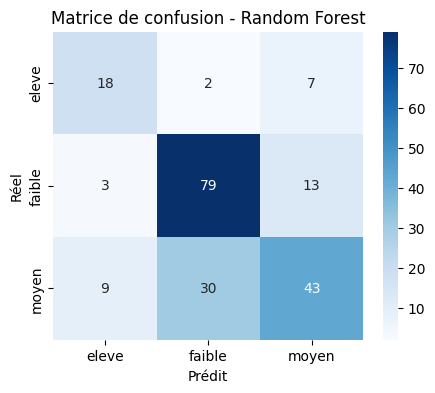

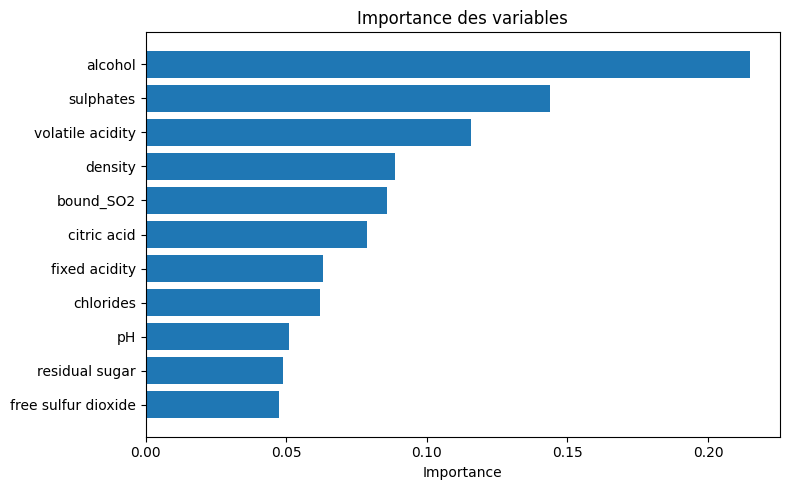

In [15]:
# 6. Modélisation - Random Forest manuelle
rf = RandomForestClassifier(
    class_weight='balanced', 
    random_state=42,
    n_estimators=300, 
    max_depth=9,
    min_samples_leaf=3, # Chaque feuille doit avoir au moins 3 échantillons
    max_leaf_nodes=59   # Chaque arbre aura au plus 59 feuilles terminales
)
rf.fit(X_train_scaled, y_train)
y_pred = rf.predict(X_test_scaled)
y_proba = rf.predict_proba(X_test_scaled)

print("=== Random Forest ===")
print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=0))
print("Matrice de confusion :\n", confusion_matrix(y_test, y_pred))

y_proba_rf = rf.predict_proba(X_test_scaled)
loss_rf = log_loss(y_test, y_proba_rf, labels=rf.classes_)
print("Log Loss Random Forest :", loss_rf)

# 7. Visualisation des résultats

# Matrice de confusion
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues", 
            xticklabels=rf.classes_, yticklabels=rf.classes_)
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.show()

# Importances des variables
importances = rf.feature_importances_
feat_names = X.columns
sorted_idx = np.argsort(importances)
plt.figure(figsize=(8,5))
plt.barh(feat_names[sorted_idx], importances[sorted_idx])
plt.title("Importance des variables")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

#### RandomforestClassifier + GreedsearchCV

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Évolution de la log-loss sur chaque combinaison testée :
Essai  1 : Log-loss = nan
Essai  2 : Log-loss = nan
Essai  3 : Log-loss = nan
Essai  4 : Log-loss = nan
Essai  5 : Log-loss = nan
Essai  6 : Log-loss = nan
Essai  7 : Log-loss = nan
Essai  8 : Log-loss = nan
Essai  9 : Log-loss = nan
Essai 10 : Log-loss = nan
Essai 11 : Log-loss = nan
Essai 12 : Log-loss = nan
Essai 13 : Log-loss = nan
Essai 14 : Log-loss = nan
Essai 15 : Log-loss = nan
Essai 16 : Log-loss = nan
Essai 17 : Log-loss = nan
Essai 18 : Log-loss = nan
Essai 19 : Log-loss = nan
Essai 20 : Log-loss = nan
Essai 21 : Log-loss = nan
Essai 22 : Log-loss = nan
Essai 23 : Log-loss = nan
Essai 24 : Log-loss = nan
Essai 25 : Log-loss = nan
Essai 26 : Log-loss = nan
Essai 27 : Log-loss = nan
Essai 28 : Log-loss = 0.7705
Essai 29 : Log-loss = 0.7710
Essai 30 : Log-loss = 0.7710
Essai 31 : Log-loss = 0.7738
Essai 32 : Log-loss = 0.7716
Essai 33 : Log-loss = 0.7718
Es

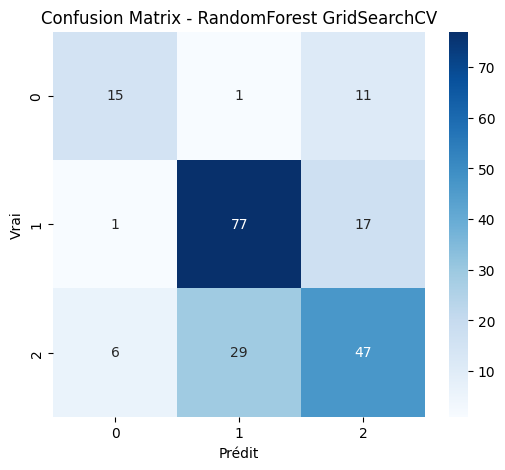

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, log_loss, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Copier la dataframe
df_CV = df.copy()

X_CV = df_CV.drop(['quality','quality_group'], axis=1)
y_CV = df_CV['quality_group']

# 2. Split identique
X_train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(
    X_CV, y_CV, test_size=0.2, random_state=42, stratify=y_CV
)

# 3. Définition de la grille d'hyperparamètres (limite la grille si tu veux un temps de calcul raisonnable)
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [6,9,12],
    "min_samples_split": [2,5,10],
    "min_samples_leaf": [1,3,5],
    "max_features": ["auto", "sqrt", "log2"],
    "class_weight": ["balanced"]
}

rf_gs = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf_gs,
    param_grid=param_grid,
    scoring="neg_log_loss",
    cv=5,
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(X_train_CV, y_train_CV)

# 4. Affichage du suivi de la perte (log-loss) pour chaque combinaison testée
results_gs = grid_search.cv_results_
loss_vals_gs = -results_gs['mean_test_score']

print("\nÉvolution de la log-loss sur chaque combinaison testée :")
for i, val in enumerate(loss_vals_gs):
    print(f"Essai {i+1:2d} : Log-loss = {val:.4f}")

print(f"\nMeilleure log-loss trouvée : {min(loss_vals_gs):.4f} (à l'essai {loss_vals_gs.argmin()+1})")
print("\nMeilleurs hyperparamètres GridSearchCV :")
print(grid_search.best_params_)

# 5. Évaluation finale sur test set
y_pred_CV = grid_search.predict(X_test_CV)
y_pred_proba_CV = grid_search.predict_proba(X_test_CV)
test_logloss_CV = log_loss(y_test_CV, y_pred_proba_CV)
test_acc_CV = accuracy_score(y_test_CV, y_pred_CV)

print(f"\nLog-loss sur le test set final : {test_logloss_CV:.4f}")
print(f"Accuracy sur le test set final : {test_acc_CV:.4f}")

print("\nClassification report (test set) :")
print(classification_report(y_test_CV, y_pred_CV))

# Matrice de confusion
plt.figure(figsize=(6,5))
sns.heatmap(confusion_matrix(y_test_CV, y_pred_CV), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - RandomForest GridSearchCV')
plt.xlabel('Prédit')
plt.ylabel('Vrai')
plt.show()


**Commentaires Random Forest optimisé :**

- Le Random Forest améliore en général l'accuracy et la log-loss par rapport à la régression logistique, surtout si le problème n'est pas purement linéaire.
- L'utilisation de `class_weight="balanced"` permet de mieux détecter la classe minoritaire, même si elle reste la plus difficile à prédire.
- L'importance des variables (`feature_importances_`) met en avant, comme attendu, des variables comme l'**alcohol** ou les **sulphates**, souvent liées à la qualité perçue du vin.
- Les hyperparamètres (nombre d'arbres, profondeur max) sont optimisés manuellement
- Et une version avec optimisation GreedSearchCV
- Si la log-loss diminue et l'accuracy monte, c'est que le modèle prédit mieux ET donne des probabilités plus fiables.
- **Limites** : la classe "faible" reste difficile à détecter à cause du déséquilibre des classes, mais le modèle est meilleur qu'une simple baseline.

**Conclusion :**  
Random Forest est le meilleur compromis dans ce cas, car il gère bien le non-linéaire, le déséquilibre, et offre une interprétabilité via l’importance des variables.

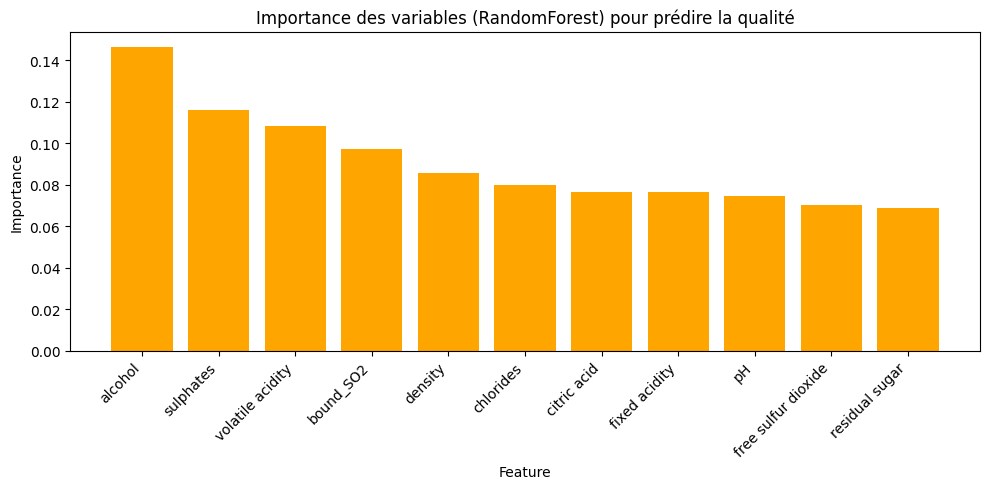

                feature  importance
9               alcohol    0.146316
8             sulphates    0.116065
1      volatile acidity    0.108042
10            bound_SO2    0.097028
6               density    0.085874
4             chlorides    0.079748
2           citric acid    0.076542
0         fixed acidity    0.076311
7                    pH    0.074734
5   free sulfur dioxide    0.070461
3        residual sugar    0.068879

Skew de l'importance :
Skew = 1.413 (skew > 0 : variables très dominantes, skew < 0 : assez plat)


In [17]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# La dataframe df_v1 existe avec 'quality' comme variable cible
df_imp = df_v1.copy()
X_imp = df_imp.drop(['quality'], axis=1)
y_imp = df_imp['quality']

# Modèle Random Forest pour l'interprétabilité rapide
rf_imp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_imp.fit(X_imp, y_imp)

# Importances
importances = rf_imp.feature_importances_
feat_names = X_imp.columns
importance_df = pd.DataFrame({'feature': feat_names, 'importance': importances})
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Affichage graphique
plt.figure(figsize=(10,5))
plt.bar(importance_df['feature'], importance_df['importance'], color='orange')
plt.xticks(rotation=45, ha='right')
plt.title("Importance des variables (RandomForest) pour prédire la qualité")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

# Affiche la table pour voir le "skew"
print(importance_df)
print("\nSkew de l'importance :")
skew_val = np.round(importance_df['importance'].skew(), 3)
print(f"Skew = {skew_val} (skew > 0 : variables très dominantes, skew < 0 : assez plat)")


In [ ]:
df_s = df_v1.copy()

# Liste des colonnes numériques SAUF 'quality'
cols_to_sum = [col for col in df_s.columns if col != 'quality']

# Calcul de la somme ligne par ligne
df_s['sum_ligne'] = df_s[cols_to_sum].sum(axis=1)

# Réorganiser pour mettre 'sum_ligne' juste après 'quality'
cols = list(df_s.columns)
# On déplace 'sum_ligne' juste après 'quality'
quality_idx = cols.index('quality')
# Enlève 'sum_ligne', puis l'insère juste après 'quality'
cols.remove('sum_ligne')
cols.insert(quality_idx+1, 'sum_ligne')
df_s = df_s[cols]

# Trie le dataframe du plus grand au plus petit selon 'sum_ligne'
df_s_sorted = df_s.sort_values(by='quality', ascending=False)

# Affiche les 10 premières lignes triées
df_s_sorted.head(20)

# Regroupe par 'quality' et décrit sum_ligne
df_s.groupby('quality')['sum_ligne'].describe()

# Liste de tri selon l'ordre d'importance vu sur le graphique
features_order = [
    "alcohol", "sulphates", "volatile acidity", "bound_SO2",
    "density", "chlorides", "citric acid", "fixed acidity",
    "pH", "free sulfur dioxide", "residual sugar"
]

# (Pour le tri les noms des colonnes doivent correspondre exactement à ceux de features_order issues du trie)

# Trie le dataframe selon toutes les colonnes, du plus grand au plus petit pour chaque
df_s_sorted_multi = df_s.sort_values(by=features_order, ascending=[False]*len(features_order))

# Export en fichier csv de la dataframe trié selon l'importances des features sur labell Quality
df_s_sorted_multi.to_csv('skew_trie.csv')
df_s_sorted_multi.head(30)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,density,pH,sulphates,alcohol,quality,sum_ligne,bound_SO2
462,15.9,0.360,6.500000e-01,7.50,0.096,22.0,0.99760,2.98,0.84,14.900000,5,115.223600,49.0
329,8.8,0.460,4.500000e-01,2.60,0.065,7.0,0.99470,3.32,0.79,14.000000,6,49.479700,11.0
96,5.2,0.340,1.000000e-12,1.80,0.050,27.0,0.99160,3.68,0.79,14.000000,6,89.851600,36.0
898,5.0,0.380,1.000000e-02,1.60,0.048,26.0,0.99084,3.70,0.75,14.000000,6,86.478840,34.0
419,5.0,0.420,2.400000e-01,2.00,0.060,19.0,0.99170,3.72,0.74,14.000000,8,77.171700,31.0
589,4.9,0.420,1.000000e-12,2.10,0.048,16.0,0.99154,3.71,0.74,14.000000,7,68.909540,26.0
1054,5.3,0.470,1.100000e-01,2.20,0.048,16.0,0.99182,3.54,0.88,13.600000,7,116.139820,73.0
799,7.4,0.360,3.400000e-01,1.80,0.075,18.0,0.99330,3.38,0.88,13.600000,7,66.828300,20.0
868,5.1,0.420,1.000000e-12,1.80,0.044,18.0,0.99157,3.68,0.73,13.600000,7,114.365570,70.0
787,5.0,0.400,5.000000e-01,4.30,0.046,29.0,0.99020,3.49,0.66,13.600000,6,108.986200,51.0


#### Analyse de chevauchement des variables explicatives

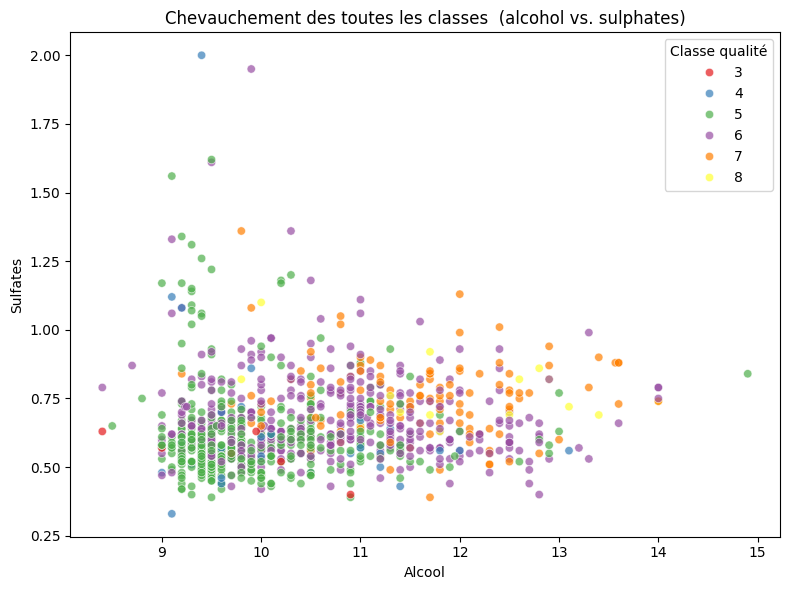

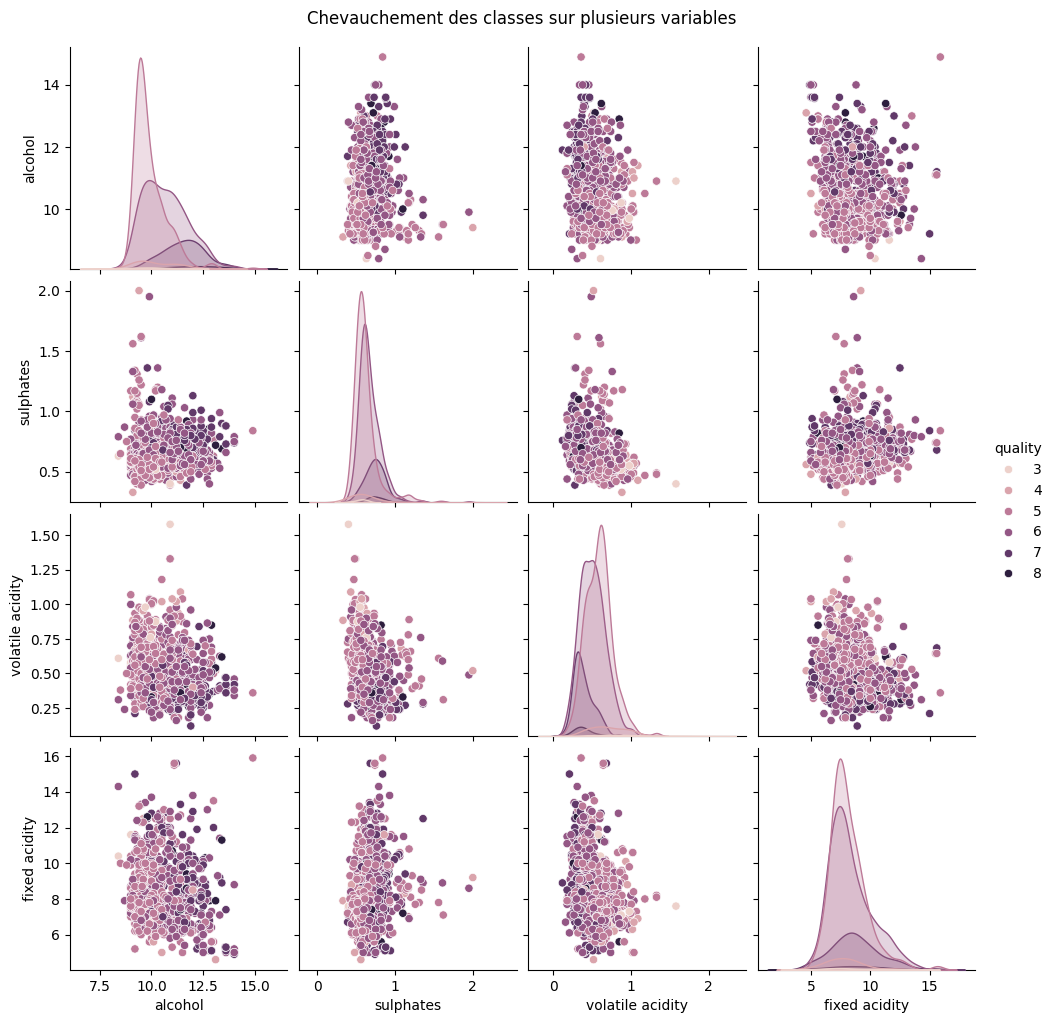

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remplace par le nom de ton DataFrame final si besoin (df, df_v1, df_v3...)
df_final = df_v1  # ou df_v1, df_v3 selon la dernière version utilisée pour la classification

# Visualisation du chevauchement de classes sur deux variables discriminantes
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_final,
    x='alcohol',
    y='sulphates',
    hue='quality',
    alpha=0.7,
    palette='Set1'
)
plt.title("Chevauchement des toutes les classes  (alcohol vs. sulphates)")
plt.xlabel("Alcool")
plt.ylabel("Sulfates")
plt.legend(title="Classe qualité")
plt.tight_layout()
plt.show()

# Optionnel : Pairplot pour plusieurs variables
sns.pairplot(df_final, hue="quality", 
             vars=['alcohol', 'sulphates', 'volatile acidity', 'fixed acidity'])
plt.suptitle("Chevauchement des classes sur plusieurs variables", y=1.02)
plt.show()


#### **Pistes à explorer**  
Ces graphiques démontrent que les scores bruts de qualité du vin (‘quality’) sont très fortement chevauchés sur les variables analytiques mesurées. Il n’existe pas de séparation évidente dans l’espace des variables ‘alcool’, ‘sulfates’, etc.  
Cela montre que le problème n’est pas seulement algorithmique, mais vient aussi de l’information limitée contenue dans le jeu de données.   
Quality est une classe subjective dépendante des capacités gustatives des oenologues, elle n'est pas une mesure exate des poids des composants chimiques.
Pour mieux prédire la qualité, il faudrait donc enrichir le dataset avec de nouvelles variables métiers (ex. informations : année,terroir, cépage, température…)  


#### Chevauchement des features
* **Visualisation 3D** en nuage de points interactifs qui s'ouvrent dans une fenëtre de navigateur separé
* Features les plus importantes qui sont les plus corrélées à la qualité du vin et qui se chevauchent

In [20]:
# Imports nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# 1. Préparation du dataframe

df_final = df_v1  

# 2. Nuage 3D interactif avec Plotly Express
fig = px.scatter_3d(
    df_final,
    x='alcohol',
    y='sulphates',
    z='volatile acidity',
    color='quality',
    opacity=0.7,
    title="Chevauchement des classes 3D (alcohol vs sulphates vs volatile acidity)"
)
fig.update_layout(
    scene=dict(
        xaxis_title="Alcool",
        yaxis_title="Sulfates",
        zaxis_title="Acidité volatile"
    )
)
fig.show(renderer='browser')